In [8]:
#Projeto Fake-Base-Station-5G
#Criado por Roger W. Coêlho
#Código para Aprendizado de Máquina Árvore de Decisão Validação Cruzada

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import graphviz 
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_fscore_support, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

In [9]:
print("Pré-Processamento de Dados: Escolha de Atributos!!!")
print()

#seed
seed = 42

df = pd.read_csv('sctp_FBS_Base.csv', low_memory=False)
df.head()

Pré-Processamento de Dados: Escolha de Atributos!!!



,Source MAC,Destination MAC,Source IP,Destination IP,Source Port,Destination Port,Supported IPs Types,Verification Tag,Checksum,Type,...,TSN Cumulative,Stream ID Chunk Data,Stream Sequence Chunk Data,TBC,Error Causes,Padding,ID Protocol Chunk Data,Protocol,Size,Label
0,70:85:c2:22:42:f8,70:85:c2:22:42:f5,192.168.0.219,192.168.0.66,41246,38412,"[6, 5]",0,3742351,1,...,NaN,5.529189e+08,NaN,NaN,NaN,NaN,NaN,132,84,Normal
1,70:85:c2:22:42:f5,70:85:c2:22:42:f8,192.168.0.66,192.168.0.219,38412,41246,NaN,372173856,3049110336,2,...,NaN,3.086134e+09,NaN,NaN,NaN,NaN,NaN,132,308,Normal
2,70:85:c2:22:42:f8,70:85:c2:22:42:f5,192.168.0.219,192.168.0.66,41246,38412,NaN,135081030,2712314290,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132,280,Normal
3,70:85:c2:22:42:f5,70:85:c2:22:42:f8,192.168.0.66,192.168.0.219,38412,41246,NaN,372173856,1999275378,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132,62,Normal
4,70:85:c2:22:42:f8,70:85:c2:22:42:f5,192.168.0.219,192.168.0.66,41246,38412,NaN,135081030,3236429928,0,...,0.0,5.529189e+08,0.0,NaN,NaN,NaN,60.0,132,136,Normal


In [10]:
#Para a tese do Roger
        
#drop no atributo "Source MAC"
attribute_name_to_remove = 'Source MAC'
df = df.drop(columns = attribute_name_to_remove)

#drop no atributo "Destination MAC"
attribute_name_to_remove = 'Destination MAC'
df = df.drop(columns = attribute_name_to_remove)

#drop no atributo "Source IP"
attribute_name_to_remove = 'Source IP'
df = df.drop(columns = attribute_name_to_remove)

#drop no atributo "Destination IP"
attribute_name_to_remove = 'Destination IP'
df = df.drop(columns = attribute_name_to_remove)

#drop no atributo "Source Port"
attribute_name_to_remove = 'Source Port'
df = df.drop(columns = attribute_name_to_remove)

#drop no atributo "Destination Port"
attribute_name_to_remove = 'Destination Port'
df = df.drop(columns = attribute_name_to_remove)

#drop no atributo "Size"
attribute_name_to_remove = 'Size'
df = df.drop(columns = attribute_name_to_remove)

In [11]:
def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
    mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
    mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print ("O dataframe selecionado possui " + str(df.shape[1]) + " colunas e " + str(df.shape[0]) + " linhas.\n"      
        "Há " + str(mz_table.shape[0]) +
        " colunas que possuem valores ausentes.")
    #mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
    return mz_table
    
missing_zero_values_table(df)

O dataframe selecionado possui 25 colunas e 1141564 linhas.
Há 20 colunas que possuem valores ausentes.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Padding,1,1141563,100.0,1141564,100.0,float64
Supported IPs Types,0,1141522,100.0,1141522,100.0,object
N_OUT_STREAMS,0,1141472,100.0,1141472,100.0,float64
N_IN_STREAMS,0,1141472,100.0,1141472,100.0,float64
Data,0,1141472,100.0,1141472,100.0,object
Error Causes,1514,1140042,99.9,1141556,100.0,float64
TBC,10,1140040,99.9,1140050,99.9,float64
TSN,0,711148,62.3,711148,62.3,float64
A_RWND,0,711058,62.3,711058,62.3,float64
Flags,431916,709648,62.2,1141564,100.0,float64


In [12]:
set(df.columns[df.isnull().mean()==0])

{'Checksum', 'Label', 'Protocol', 'Type', 'Verification Tag'}

In [13]:
#Nome das colunas que possuem valores em falta
df.columns[df.isnull().any()]

print(df.shape)

# drop columns with all NaN's
df = df.dropna(axis=1, how='any')

print(df.shape)

print(df.shape)
df.drop(df.columns[df.isnull().any()], axis=1)
print(df.shape)

print(df.shape)
#df = df.dropna()
    
df.shape

attribute_target = 'Label'
df[attribute_target] = df[attribute_target].replace(['Normal', 'Attack'], [0.0,1.0])

df.Label

#target
target = df["Label"]

df.to_csv('ataqueTeste.csv', index=False)

# getting scaled train data
dataset = df.drop("Label", axis=1)

# Definir os dados de entrada (X) e os rótulos de saída (y)
X = dataset
y = target

# Definir a validação cruzada com 10 folds
kfold = 10

df.dtypes

(1141564, 25)
(1141564, 5)
(1141564, 5)
(1141564, 5)
(1141564, 5)


Verification Tag      int64
Checksum              int64
Type                  int64
Protocol              int64
Label               float64
dtype: object

In [14]:
# Inicializar o modelo de árvore de decisão
DT_Model = tree.DecisionTreeClassifier(random_state=seed)
print()

# Realizar a validação cruzada para obter os scores de acurácia
scores = cross_val_score(DT_Model, X, y, cv=kfold)

# Imprimir os scores de cada fold e a média dos scores
resultado = []
print("Scores de cada fold:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: ", round(score * 100 , 2))
print(f"\nMédia dos scores: {round(scores.mean() * 100, 2)}")

resultado.append(("Modelo Decision Tree", round(scores.mean() * 100, 2), "{:.2e}".format(scores.std())))

# Construção de um DataFrame para os resultados
resultados_df = pd.DataFrame(resultado, columns=['Model', 'Mean Accuracy', 'Standard Deviation'])

print(resultados_df)

print()

# Obter previsões usando cross_val_predict
predictions = cross_val_predict(DT_Model, X, y, cv=kfold)

# Calcular as métricas
precision = precision_score(y, predictions, average='weighted')
recall = recall_score(y, predictions, average='weighted')
f1 = f1_score(y, predictions, average='weighted')
all_results = precision_recall_fscore_support(y, predictions, average='weighted')

print("Métricas weighted avg")
print("Precision (weighted avg):", round(precision * 100, 2))
print("Recall (weighted avg):", round(recall * 100, 2))
print("F1 Score (weighted avg):", round(f1 * 100, 2))
print("Todos os Resultados: ", all_results)
print()

# Calcular as métricas Macro Average
precision_macro = precision_score(y, predictions, average='macro')
recall_macro = recall_score(y, predictions, average='macro')
f1_macro = f1_score(y, predictions, average='macro')
all_results = precision_recall_fscore_support(y, predictions, average='macro')

print("Métricas macro avg")
print("Precision (macro avg):", round(precision_macro * 100, 2))
print("Recall (macro avg):", round(recall_macro * 100, 2))
print("F1 Score (macro avg):", round(f1_macro * 100, 2))
print("Todos os Resultados: ", all_results)
print()

# Calcular as métricas Micro Average
precision_micro = precision_score(y, predictions, average='micro')
recall_micro = recall_score(y, predictions, average='micro')
f1_micro = f1_score(y, predictions, average='micro')
all_results = precision_recall_fscore_support(y, predictions, average='micro')

print("Métricas micro avg")
print("Precision (micro avg):", round(precision_micro * 100, 2))
print("Recall (micro avg):", round(recall_micro * 100, 2))
print("F1 Score (micro avg):", round(f1_micro * 100, 2))
print("Todos os Resultados: ", all_results)
print()

#Classification Report, Accuracy e AUC
report = classification_report(y, predictions)
accuracy = round(accuracy_score(y, predictions) * 100, 2)
auc = round(roc_auc_score(y, predictions), 2) if len(np.unique(y)) > 1 else None  # Verificar se há mais de uma classe para AUC

print("Modelo Decision Tree")
print(report)
print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")

DT_Model.fit(X, y)


Scores de cada fold:
Fold 1:  100.0
Fold 2:  99.71
Fold 3:  100.0
Fold 4:  100.0
Fold 5:  100.0
Fold 6:  100.0
Fold 7:  100.0
Fold 8:  99.99
Fold 9:  100.0
Fold 10:  100.0

Média dos scores: 99.97
                  Model  Mean Accuracy Standard Deviation
0  Modelo Decision Tree          99.97           8.69e-04

Métricas weighted avg
Precision (weighted avg): 99.97
Recall (weighted avg): 99.97
F1 Score (weighted avg): 99.97
Todos os Resultados:  (0.999698850322163, 0.9996986590326955, 0.9996986636656552, None)

Métricas macro avg
Precision (macro avg): 99.97
Recall (macro avg): 99.97
F1 Score (macro avg): 99.97
Todos os Resultados:  (0.9996826029510544, 0.9997133333333333, 0.999697876655087, None)

Métricas micro avg
Precision (micro avg): 99.97
Recall (micro avg): 99.97
F1 Score (micro avg): 99.97
Todos os Resultados:  (0.9996986590326955, 0.9996986590326955, 0.9996986590326955, None)

Modelo Decision Tree
              precision    recall  f1-score   support

         0.0       1.00

DecisionTreeClassifier(random_state=42)

Matriz de Confusão Modelo Decision Tree


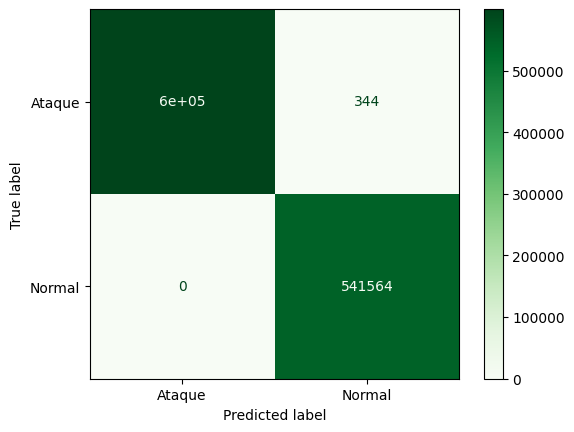

In [15]:
#Matriz de Confusão Modelo Decision Tree
print("Matriz de Confusão Modelo Decision Tree")
labels = ['Normal', 'Ataque']
cm = confusion_matrix(y, predictions) 
cm_inverted = cm.copy()
cm_inverted[0, 0], cm_inverted[1, 1] = cm[1, 1], cm[0, 0]  # Troca TN <-> TP
cm_inverted[0, 1], cm_inverted[1, 0] = cm[1, 0], cm[0, 1]  # Troca FP <-> FN
inverted_labels = labels[::-1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_inverted, display_labels=inverted_labels)
disp.plot(cmap=plt.cm.Greens)
plt.grid(False)
plt.show()

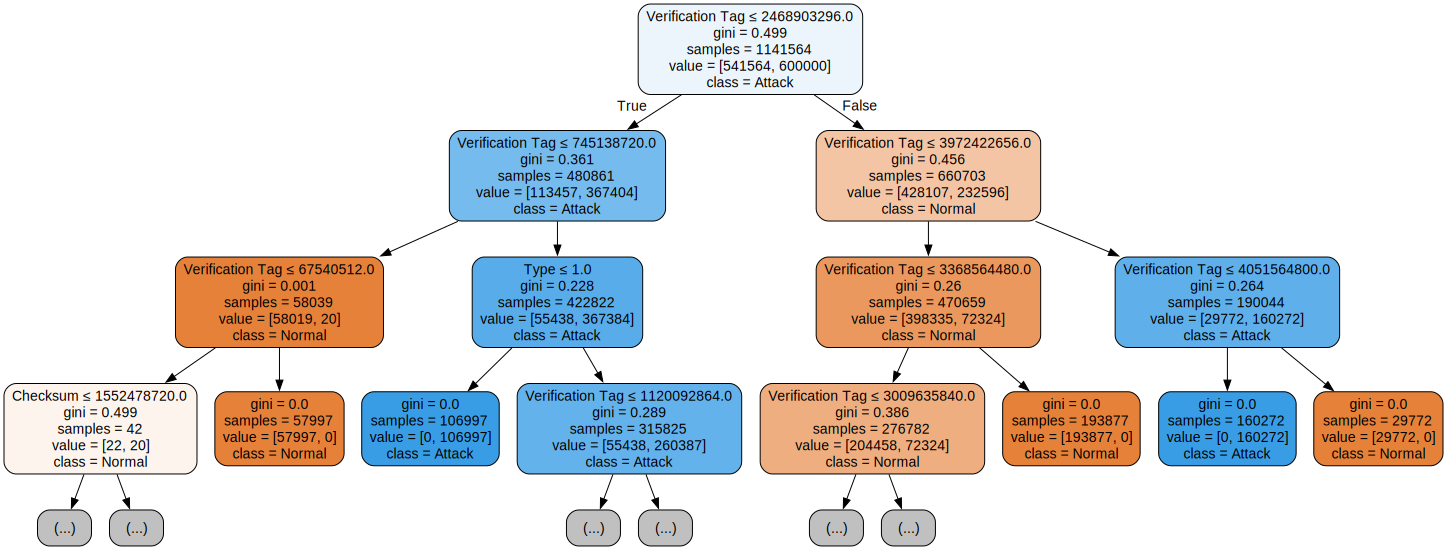

In [16]:
dot_data = export_graphviz(DT_Model, max_depth = 3,  #Limit to a Depth of 3 only
                      out_file=None, 
                      feature_names=dataset.columns,       #Provide X Variables Column Names 
                      class_names=['Normal', 'Attack'],          # Provide Target Variable Column Name
                      filled=True, rounded=True,     # Controls the look of the nodes and colours it
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Export Decision Tree PDF

In [17]:
dot_data = export_graphviz(DT_Model, out_file=None, 
                      feature_names=dataset.columns,  
                      class_names=['Normal', 'Attack'], 
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("sctp_FBS_Base") 

'sctp_FBS_Base.pdf'

# Gráficos seaborn Invertida as cores

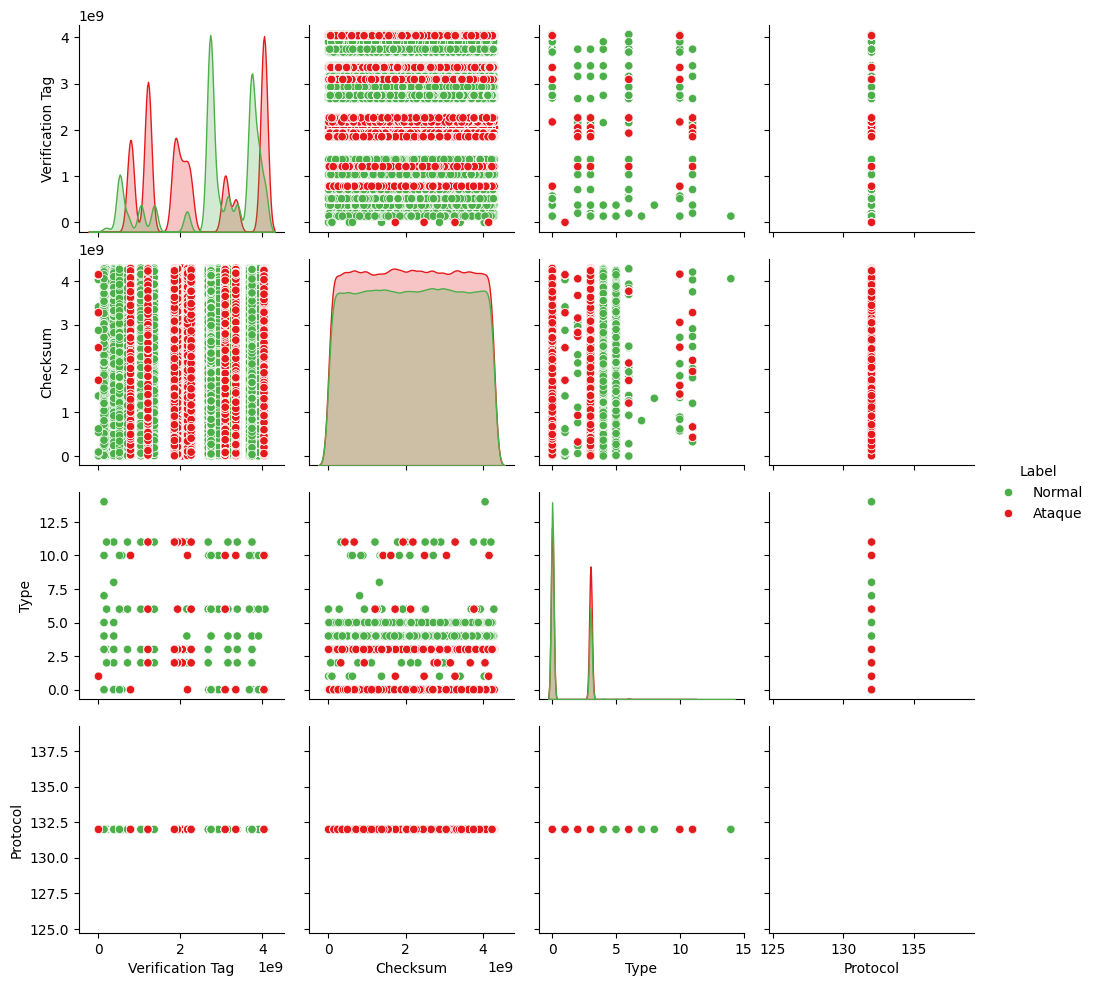

In [18]:
import seaborn as sns
%matplotlib inline

df['Label'] = df['Label'].replace({0.0: 'Normal', 1.0: 'Ataque'})

paleta_invertida = {"Normal": "#4daf4a", "Ataque": "#e41a1c"} 

sns.pairplot(df, hue='Label', palette=paleta_invertida)

In [19]:
print("Finalizado!!!")

Finalizado!!!
